In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn import preprocessing

In [2]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [4]:
x = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']].values
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [5]:
y = df['churn'].values
y[0:5]

array([1, 1, 0, 0, 0])

In [15]:
# normalization of data set
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [7]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 9)
(40, 9)
(160,)
(40,)


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
yhat = lr.predict(x_test)
print(yhat)
print(y_test)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1]
[0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0]


In [20]:
yhat_prob = lr.predict_proba(x_test)
print(yhat_prob[0:9])

[[0.58711718 0.41288282]
 [0.56650898 0.43349102]
 [0.5313329  0.4686671 ]
 [0.66722528 0.33277472]
 [0.53481231 0.46518769]
 [0.59508358 0.40491642]
 [0.49995014 0.50004986]
 [0.56532893 0.43467107]
 [0.39939231 0.60060769]]


In [21]:
from sklearn.metrics import jaccard_score, confusion_matrix
print(jaccard_score(y_test, yhat, pos_label=0))
print(jaccard_score(y_test, yhat, pos_label=1))

0.5625
0.36363636363636365


In [22]:
cm = confusion_matrix(y_test, yhat, labels=[0, 1])

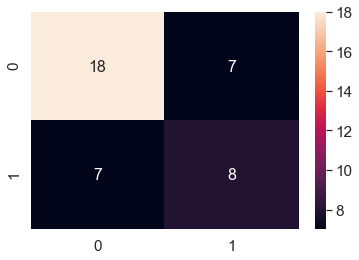

In [23]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40

